Problem Statement:

During climate disasters like floods, cyclones,EarthQuake a huge amount of information spreads rapidly on Twitter, news sites, and messaging platforms. While some of this information is genuine—such as alerts, rescue details, and safety instructions—much of it can be false, including rumors, fake donation links, or misleading advice.
This misinformation not only creates panic but also makes it harder for people and relief organizations to respond effectively during crises.

Objective:

The aim of this project is to build an application that can automatically check whether a tweet or news headline about climate disasters is real or fake. By applying techniques from Natural Language Processing (NLP), the system will help filter out false information and ensure that only reliable updates are highlighted. This can support people and organizations in making better decisions during emergencies.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
train_df = pd.read_csv("D:/Crisis-Tweet-Analyzer/train.csv")

In [19]:
true_df = pd.read_csv("D:/Crisis-Tweet-Analyzer/true.csv")

In [7]:
false_df = pd.read_csv("D:/Crisis-Tweet-Analyzer/Fake.csv")

In [8]:
print(train_df.head())

print(train_df.info())
# Checkind for missing values
print(train_df.isnull().sum())

print(train_df.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
lo

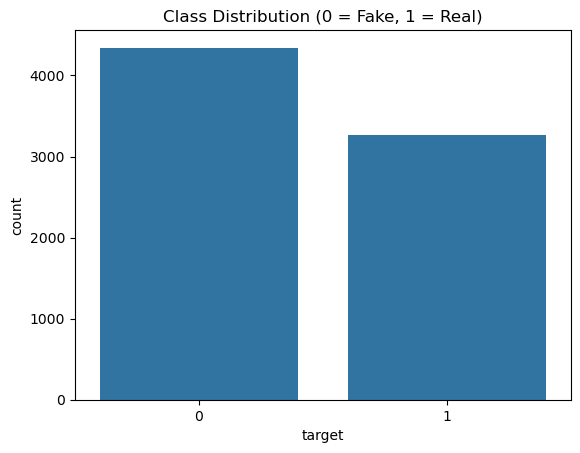

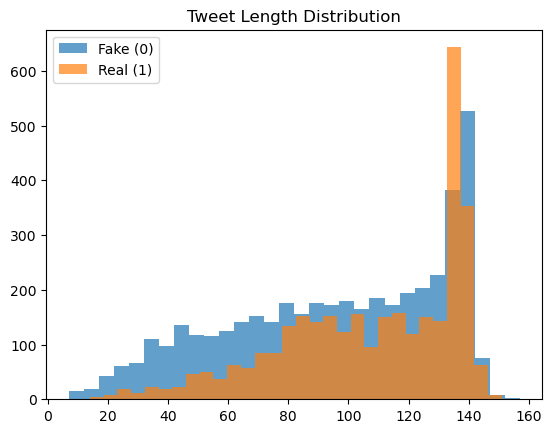

In [9]:
# Target class distribution
sns.countplot(x='target', data=train_df)
plt.title("Class Distribution (0 = Fake, 1 = Real)")
plt.show()

# Tweet length distribution
train_df['text_length'] = train_df['text'].apply(len)

plt.hist(train_df[train_df['target']==0]['text_length'], bins=30, alpha=0.7, label="Fake (0)")
plt.hist(train_df[train_df['target']==1]['text_length'], bins=30, alpha=0.7, label="Real (1)")
plt.legend()
plt.title("Tweet Length Distribution")
plt.show()


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)        # Remove links
    text = re.sub(r"@\w+|#\w+", "", text)             # Remove mentions, hashtags
    text = re.sub(r"[^a-z\s]", "", text)              # Keep only letters
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)

print(train_df[['text','clean_text']].head(10))


                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   
5  #RockyFire Update => California Hwy. 20 closed...   
6  #flood #disaster Heavy rain causes flash flood...   
7  I'm on top of the hill and I can see a fire in...   
8  There's an emergency evacuation happening now ...   
9  I'm afraid that the tornado is coming to our a...   

                                          clean_text  
0                  deeds reason may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3        people receive evacuation orders california  
4             got sent photo ruby smoke pours school  
5  update california hwy closed directions due la... 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['target']

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (7613, 5000)
